In [2]:
#@title Mounting the Google Drive
%cd '/content/drive/MyDrive/Colab Notebooks/XMRI'

/content/drive/MyDrive/Colab Notebooks/XMRI


In [3]:
#@title Imports of standard and custom modules/classes
from curses import flash
import logging
import os
from pathlib import Path
from data import DataLoad
from utils import Utils
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from model import Models
import tensorflow as tf
import random
logging.basicConfig(level=logging.INFO)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42) 

In [4]:
logging.basicConfig(level=logging.INFO)
dl =  DataLoad()
# dl.build(flag=True)
dl.load()

INFO:root:Class instantiated successfully with default input= ./Data/brainTumorDataPublic and output = ./Data/brainTumorDataPublic.npz paths set respectively.
INFO:root:3157 samples loaded successfully belonging to 3 tumor classes.


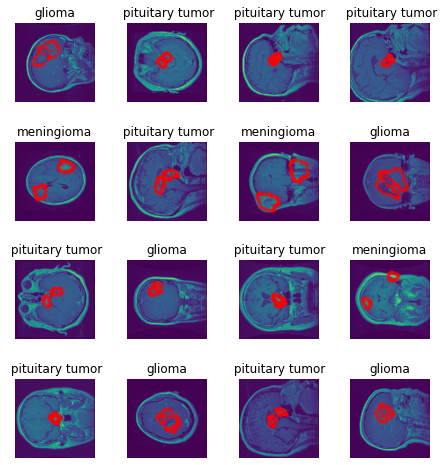

In [5]:
idx = np.random.randint(0, dl.X.shape[0],16)
Utils.plot_samples(dl.A,dl.y,dl.Z,dl.CLASSES,idx,save=True)

INFO:root:TNSE embedding created successfully. Displaying the 2D projection onto a scatterplot.
INFO:root:Figure ./Figures/XMRI_TSNE_Before.svg written successfully.


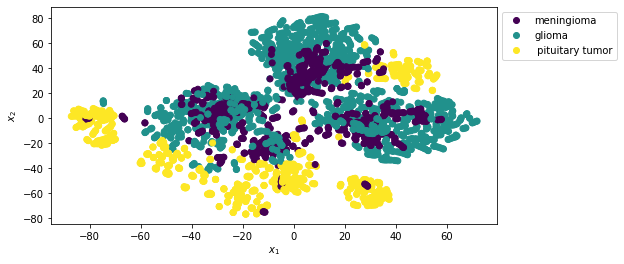

In [6]:
Utils.project2D(dl.X_, dl.y,dl.CLASSES,figname='XMRI_TSNE_Before',save=True)

In [7]:
#@title Splitting the dataset into train/test
X_train,X_test,y_train,y_test = train_test_split(dl.X_,dl.y, test_size=0.2, shuffle=True)

In [8]:
#@title Instantiating the Models method
models = Models()

In [9]:
#@title Training different CNN model
dft = models.train(X_train= X_train,X_test = X_test,y_train = y_train,y_test = y_test,input_shape = X_train.shape[1:],output_nums = len(dl.CLASSES),CLASSES = dl.CLASSES,n=10)

  0%|          | 0/8 [00:00<?, ?it/s]INFO:root:Model built successfully vgg16
INFO:root:We are training vgg16
INFO:root:====================================================================


Epoch 1/10
71/71 [==============================] - 51s 476ms/step - loss: 1.0667 - accuracy: 0.4745 - val_loss: 1.0309 - val_accuracy: 0.4545
Epoch 2/10
71/71 [==============================] - 32s 453ms/step - loss: 0.9424 - accuracy: 0.5348 - val_loss: 0.7822 - val_accuracy: 0.6917
Epoch 3/10
71/71 [==============================] - 34s 476ms/step - loss: 0.7453 - accuracy: 0.6840 - val_loss: 0.7025 - val_accuracy: 0.7115
Epoch 4/10
71/71 [==============================] - 34s 484ms/step - loss: 0.6407 - accuracy: 0.7104 - val_loss: 0.5228 - val_accuracy: 0.7747
Epoch 5/10
71/71 [==============================] - 34s 480ms/step - loss: 0.5748 - accuracy: 0.7469 - val_loss: 0.5057 - val_accuracy: 0.7945
Epoch 6/10
71/71 [==============================] - 35s 486ms/step - loss: 0.4774 - accuracy: 0.7848 - val_loss: 0.4573 - val_accuracy: 0.8300
Epoch 7/10
71/71 [==============================] - 34s 486ms/step - loss: 0.4573 - accuracy: 0.8019 - val_loss: 0.4422 - val_accuracy: 0.8221

INFO:root:Plot saved successfully to ./Figures/vgg16_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/vgg16/assets


INFO:tensorflow:Assets written to: ./Models/vgg16/assets
INFO:root:vgg16 trained and evaluted successfully.
 12%|█▎        | 1/8 [06:36<46:12, 396.04s/it]INFO:root:Model built successfully vgg19
INFO:root:We are training vgg19
INFO:root:====================================================================


Epoch 1/10
71/71 [==============================] - 42s 586ms/step - loss: 1.0745 - accuracy: 0.4727 - val_loss: 1.0544 - val_accuracy: 0.4545
Epoch 2/10
71/71 [==============================] - 40s 569ms/step - loss: 1.0487 - accuracy: 0.4723 - val_loss: 1.0367 - val_accuracy: 0.4545
Epoch 3/10
71/71 [==============================] - 41s 576ms/step - loss: 0.9891 - accuracy: 0.4855 - val_loss: 0.8182 - val_accuracy: 0.6285
Epoch 4/10
71/71 [==============================] - 41s 573ms/step - loss: 0.8025 - accuracy: 0.6540 - val_loss: 0.6617 - val_accuracy: 0.7312
Epoch 5/10
71/71 [==============================] - 41s 574ms/step - loss: 0.6945 - accuracy: 0.6923 - val_loss: 0.5615 - val_accuracy: 0.7273
Epoch 6/10
71/71 [==============================] - 41s 576ms/step - loss: 0.5873 - accuracy: 0.7271 - val_loss: 0.5219 - val_accuracy: 0.8103
Epoch 7/10
71/71 [==============================] - 41s 575ms/step - loss: 0.5355 - accuracy: 0.7606 - val_loss: 0.4714 - val_accuracy: 0.8142

INFO:root:Plot saved successfully to ./Figures/vgg19_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/vgg19/assets


INFO:tensorflow:Assets written to: ./Models/vgg19/assets
INFO:root:vgg19 trained and evaluted successfully.
 25%|██▌       | 2/8 [14:06<42:48, 428.01s/it]INFO:root:Model built successfully resnet50
INFO:root:We are training resnet50
INFO:root:====================================================================


Epoch 1/10
71/71 [==============================] - 34s 396ms/step - loss: 10.2960 - accuracy: 0.5053 - val_loss: 4209.4795 - val_accuracy: 0.5020
Epoch 2/10
71/71 [==============================] - 26s 370ms/step - loss: 3.7640 - accuracy: 0.5960 - val_loss: 217.7881 - val_accuracy: 0.5929
Epoch 3/10
71/71 [==============================] - 26s 364ms/step - loss: 1.9936 - accuracy: 0.6972 - val_loss: 0.5940 - val_accuracy: 0.8221
Epoch 4/10
71/71 [==============================] - 26s 366ms/step - loss: 3.4194 - accuracy: 0.6580 - val_loss: 2.0359 - val_accuracy: 0.6838
Epoch 5/10
71/71 [==============================] - 26s 367ms/step - loss: 1.6901 - accuracy: 0.6809 - val_loss: 0.7398 - val_accuracy: 0.6917
Epoch 6/10
71/71 [==============================] - 26s 368ms/step - loss: 2.2074 - accuracy: 0.7702 - val_loss: 0.8653 - val_accuracy: 0.6087
Epoch 7/10
71/71 [==============================] - 26s 367ms/step - loss: 1.2393 - accuracy: 0.7821 - val_loss: 0.7105 - val_accuracy: 

INFO:root:Plot saved successfully to ./Figures/resnet50_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/resnet50/assets


INFO:tensorflow:Assets written to: ./Models/resnet50/assets
INFO:root:resnet50 trained and evaluted successfully.
 38%|███▊      | 3/8 [19:56<32:41, 392.39s/it]INFO:root:Model built successfully xception
INFO:root:We are training xception
INFO:root:====================================================================


Epoch 1/10
71/71 [==============================] - 54s 669ms/step - loss: 0.4854 - accuracy: 0.7962 - val_loss: 1.0971 - val_accuracy: 0.4545
Epoch 2/10
71/71 [==============================] - 44s 625ms/step - loss: 0.1707 - accuracy: 0.9340 - val_loss: 1.0986 - val_accuracy: 0.4545
Epoch 3/10
71/71 [==============================] - 45s 634ms/step - loss: 0.0838 - accuracy: 0.9657 - val_loss: 1.0911 - val_accuracy: 0.4545
Epoch 4/10
71/71 [==============================] - 45s 631ms/step - loss: 0.0237 - accuracy: 0.9956 - val_loss: 1.0757 - val_accuracy: 0.4545
Epoch 5/10
71/71 [==============================] - 45s 631ms/step - loss: 0.0097 - accuracy: 0.9991 - val_loss: 1.0401 - val_accuracy: 0.4545
Epoch 6/10
71/71 [==============================] - 45s 635ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.9534 - val_accuracy: 0.4901
Epoch 7/10
71/71 [==============================] - 45s 633ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.7574 - val_accuracy: 0.8656

INFO:root:Plot saved successfully to ./Figures/xception_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/xception/assets


INFO:tensorflow:Assets written to: ./Models/xception/assets
INFO:root:xception trained and evaluted successfully.
 50%|█████     | 4/8 [27:54<28:24, 426.11s/it]INFO:root:Model built successfully resnet50v2
INFO:root:We are training resnet50v2
INFO:root:====================================================================


Epoch 1/10
71/71 [==============================] - 30s 344ms/step - loss: 2.5232 - accuracy: 0.6395 - val_loss: 84.6622 - val_accuracy: 0.5771
Epoch 2/10
71/71 [==============================] - 24s 336ms/step - loss: 2.2931 - accuracy: 0.7333 - val_loss: 40.8771 - val_accuracy: 0.5613
Epoch 3/10
71/71 [==============================] - 23s 323ms/step - loss: 0.9175 - accuracy: 0.8301 - val_loss: 4.4800 - val_accuracy: 0.8221
Epoch 4/10
71/71 [==============================] - 23s 320ms/step - loss: 0.4715 - accuracy: 0.8728 - val_loss: 0.6354 - val_accuracy: 0.8300
Epoch 5/10
71/71 [==============================] - 23s 326ms/step - loss: 0.3960 - accuracy: 0.9032 - val_loss: 0.6227 - val_accuracy: 0.8735
Epoch 6/10
71/71 [==============================] - 23s 327ms/step - loss: 0.1677 - accuracy: 0.9591 - val_loss: 0.3250 - val_accuracy: 0.9012
Epoch 7/10
71/71 [==============================] - 23s 325ms/step - loss: 0.1295 - accuracy: 0.9762 - val_loss: 0.2584 - val_accuracy: 0.93

INFO:root:Plot saved successfully to ./Figures/resnet50v2_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/resnet50v2/assets


INFO:tensorflow:Assets written to: ./Models/resnet50v2/assets
INFO:root:resnet50v2 trained and evaluted successfully.
 62%|██████▎   | 5/8 [32:42<18:49, 376.41s/it]INFO:root:Model built successfully inception_v3
INFO:root:We are training inception_v3
INFO:root:====================================================================


Epoch 1/10
71/71 [==============================] - 30s 291ms/step - loss: 1.8739 - accuracy: 0.5502 - val_loss: 5803.8374 - val_accuracy: 0.4545
Epoch 2/10
71/71 [==============================] - 18s 260ms/step - loss: 1.4914 - accuracy: 0.6320 - val_loss: 1227.2834 - val_accuracy: 0.4743
Epoch 3/10
71/71 [==============================] - 18s 254ms/step - loss: 1.0511 - accuracy: 0.6871 - val_loss: 13.1644 - val_accuracy: 0.7352
Epoch 4/10
71/71 [==============================] - 18s 252ms/step - loss: 0.8374 - accuracy: 0.7386 - val_loss: 0.8421 - val_accuracy: 0.5573
Epoch 5/10
71/71 [==============================] - 18s 255ms/step - loss: 0.5458 - accuracy: 0.7896 - val_loss: 0.5015 - val_accuracy: 0.7589
Epoch 6/10
71/71 [==============================] - 18s 258ms/step - loss: 0.3970 - accuracy: 0.8380 - val_loss: 0.6389 - val_accuracy: 0.7747
Epoch 7/10
71/71 [==============================] - 18s 255ms/step - loss: 0.7796 - accuracy: 0.8398 - val_loss: 0.9358 - val_accuracy:

INFO:root:Plot saved successfully to ./Figures/inception_v3_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/inception_v3/assets


INFO:tensorflow:Assets written to: ./Models/inception_v3/assets
INFO:root:inception_v3 trained and evaluted successfully.
 75%|███████▌  | 6/8 [36:44<11:01, 330.65s/it]INFO:root:Model built successfully densenet121
INFO:root:We are training densenet121
INFO:root:====================================================================


Epoch 1/10
71/71 [==============================] - 45s 424ms/step - loss: 1.0810 - accuracy: 0.6989 - val_loss: 0.5575 - val_accuracy: 0.7747
Epoch 2/10
71/71 [==============================] - 27s 377ms/step - loss: 1.0926 - accuracy: 0.7698 - val_loss: 0.9429 - val_accuracy: 0.7391
Epoch 3/10
71/71 [==============================] - 27s 374ms/step - loss: 0.7070 - accuracy: 0.8297 - val_loss: 0.9265 - val_accuracy: 0.6996
Epoch 4/10
71/71 [==============================] - 27s 375ms/step - loss: 0.3439 - accuracy: 0.8834 - val_loss: 0.8466 - val_accuracy: 0.7708
Epoch 5/10
71/71 [==============================] - 27s 376ms/step - loss: 0.2441 - accuracy: 0.9217 - val_loss: 0.4880 - val_accuracy: 0.8300
Epoch 6/10
71/71 [==============================] - 27s 375ms/step - loss: 0.1409 - accuracy: 0.9591 - val_loss: 0.2664 - val_accuracy: 0.9051
Epoch 7/10
71/71 [==============================] - 27s 383ms/step - loss: 0.0846 - accuracy: 0.9732 - val_loss: 0.2208 - val_accuracy: 0.9407

INFO:root:Plot saved successfully to ./Figures/densenet121_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/densenet121/assets


INFO:tensorflow:Assets written to: ./Models/densenet121/assets
INFO:root:densenet121 trained and evaluted successfully.
 88%|████████▊ | 7/8 [43:02<05:46, 346.02s/it]INFO:root:Model built successfully efficientnetv2-b0
INFO:root:We are training efficientnetv2-b0
INFO:root:====================================================================


Epoch 1/10
71/71 [==============================] - 27s 226ms/step - loss: 20.9975 - accuracy: 0.3578 - val_loss: 104.3636 - val_accuracy: 0.4545
Epoch 2/10
71/71 [==============================] - 14s 199ms/step - loss: 16.4244 - accuracy: 0.4309 - val_loss: 2.2178 - val_accuracy: 0.4545
Epoch 3/10
71/71 [==============================] - 14s 201ms/step - loss: 1.2680 - accuracy: 0.6228 - val_loss: 1.1937 - val_accuracy: 0.5613
Epoch 4/10
71/71 [==============================] - 14s 199ms/step - loss: 0.6842 - accuracy: 0.7667 - val_loss: 0.5179 - val_accuracy: 0.8182
Epoch 5/10
71/71 [==============================] - 14s 197ms/step - loss: 0.4322 - accuracy: 0.8165 - val_loss: 1.5068 - val_accuracy: 0.7510
Epoch 6/10
71/71 [==============================] - 14s 197ms/step - loss: 0.3552 - accuracy: 0.8622 - val_loss: 0.6353 - val_accuracy: 0.8182
Epoch 7/10
71/71 [==============================] - 14s 198ms/step - loss: 0.2349 - accuracy: 0.9062 - val_loss: 0.3039 - val_accuracy: 0.

INFO:root:Plot saved successfully to ./Figures/efficientnetv2-b0_plot_confusion_matrix.png.svg


INFO:tensorflow:Assets written to: ./Models/efficientnetv2-b0/assets


INFO:tensorflow:Assets written to: ./Models/efficientnetv2-b0/assets
INFO:root:efficientnetv2-b0 trained and evaluted successfully.
100%|██████████| 8/8 [47:10<00:00, 353.77s/it]
INFO:root:Evaluation results written to ./Data/Evaluation_Results.csv


In [9]:
#@title Reading evaluation results from a csv file
dft =  pd.read_csv('./Data/Evaluation_Results.csv')
dft

,Unnamed: 0,model,accuracy,f1_score,time
0,0,vgg16,0.813291,0.813291,383.190165
1,1,vgg19,0.838608,0.838608,443.157131
2,2,resnet50,0.797468,0.797468,326.483098
3,3,xception,0.939873,0.939873,458.128462
4,4,resnet50v2,0.941456,0.941456,266.329639
5,5,inception_v3,0.857595,0.857595,208.276000
6,6,densenet121,0.949367,0.949367,333.849376
7,7,efficientnetv2-b0,0.892405,0.892405,211.151268


<Figure size 576x288 with 0 Axes>

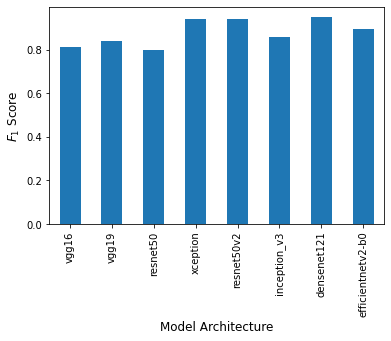

In [12]:
#@title Plotting Models test performance
plt.figure(1,figsize=(8,4))
ax = dft.plot.bar(x='model', y='f1_score',legend=False)
plt.ylabel(r'$F_1$ Score',fontsize=12)
plt.xlabel('Model Architecture',fontsize=12)
# ax.legend([r'$F_1$ Score'],loc='best',bbox_to_anchor=(1.0, 1.0)) 
# plt.grid()
plt.savefig(f'./Figures/Train_Time_Accuracy.svg', bbox_inches ="tight", dpi=300)
plt.show()

In [19]:
#@title We load a saved trained model
model = tf.keras.models.load_model("./Models/densenet121")
repmodel  = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output, name = model.name)

In [ ]:
#@title We are using the internal layers of the model to get the learnt representation of the dataset
X_hat =  repmodel.predict(dl.X_)
Utils.project2D(X_hat, dl.y,dl.CLASSES,figname='XMRI_TSNE_After_resnet50v2',save=True)

INFO:root:TNSE embedding created successfully. Displaying the 2D projection onto a scatterplot.
INFO:root:Figure ./Figures/XMRI_TSNE_After.svg written successfully.


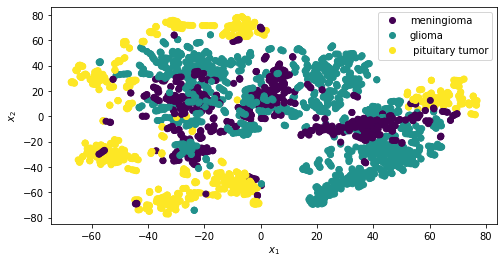

In [14]:
#@title We are using T-SNE to visualize the latent representations of the selected model
X_hat =  repmodel.predict(dl.X_)
Utils.project2D(X_hat, dl.y,dl.CLASSES,figname='XMRI_TSNE_After',save=True)

# Salency Analysis

In [9]:
# %pip install saliency

In [6]:
#@title Importing the saliency module. If not installed use the above pip command to install it in your environment
import PIL.Image
from matplotlib import pylab as P
# From our repository.
import saliency.core as saliency
import PIL.Image
%matplotlib inline

In [7]:
#@title Snippet to compute prediction_feature gradients
class_idx_str = 'class_idx_str'
def call_model_function(images, call_model_args=None, expected_keys=None):
    target_class_idx =  call_model_args[class_idx_str]
    images = tf.convert_to_tensor(images)
    with tf.GradientTape() as tape:
        if expected_keys==[saliency.base.INPUT_OUTPUT_GRADIENTS]:
            tape.watch(images)
            output_layer = model(images)
            output_layer = output_layer[:,target_class_idx]
            gradients = np.array(tape.gradient(output_layer, images))
            return {saliency.base.INPUT_OUTPUT_GRADIENTS: gradients}
        else:
            conv_layer, output_layer = model(images)
            gradients = np.array(tape.gradient(output_layer, conv_layer))
            return {saliency.base.CONVOLUTION_LAYER_VALUES: conv_layer,
                    saliency.base.CONVOLUTION_OUTPUT_GRADIENTS: gradients}

def PreprocessImage(im):
  # im = tf.keras.applications.vgg16.preprocess_input(im)
  return tf.keras.applications.xception.preprocess_input(im)

In [8]:
#@title Function to perform model inference
def inference(dl,model):
  idx = np.random.randint(0,dl.X_.shape[0]) 
  im = dl.X_[idx]
  predictions = model(np.array([im]))
  prediction_class = np.argmax(predictions[0])
  call_model_args = {class_idx_str: prediction_class}
  pred_prob = np.round(predictions[0,prediction_class].numpy(),2)
  return idx,predictions,prediction_class,call_model_args,pred_prob

In [20]:
#@title Saliency Computation Code

data =  {'img': [], 'tumorBorder': [], 'original': [],'predictions': [], 'prediction_class': [],'call_model_args':[],'pred_prob':[],'actual': [],'idx': []}
vizresult = {'Image': [],'tumorBorder': [], 'VG': [] ,'SmoothGrad': [] ,'IG': [] ,'SmoothGrad': [] ,'XRAI_Full': [] ,'Fast_XRAI' :[] ,'VIG': [], 'GIG': [] ,'Blur_IG':[]}
mycollection = []
while(len(data['img']) < 3):
  idx,predictions,prediction_class,call_model_args,pred_prob = inference(dl,model)
  if( prediction_class not in data['prediction_class']):
    data['img'].append(dl.X_[idx])
    data['tumorBorder'].append(dl.Z[idx])
    data['original'].append(dl.A[idx])
    data['predictions'].append(predictions)
    data['prediction_class'].append(prediction_class)
    data['call_model_args'].append(call_model_args)
    data['pred_prob'].append(pred_prob)
    data['actual'].append(dl.y[idx])
    data['idx'].append(idx)

    im =  dl.X_[idx]
    vizresult['Image'].append(dl.A[idx])
    vizresult['tumorBorder'].append(dl.Z[idx])


    # Construct the saliency object. This alone doesn't do anthing.
    gradient_saliency = saliency.GradientSaliency()

    # Compute the vanilla mask and the smoothed mask.
    vanilla_mask_3d = gradient_saliency.GetMask(im, call_model_function, call_model_args)
    smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args)

    # Call the visualization methods to convert the 3D tensors to 2D grayscale.
    vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_mask_3d)
    smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)
    vizresult['VG'].append(vanilla_mask_grayscale)
    vizresult['SmoothGrad'].append(smoothgrad_mask_grayscale)


    mycollection.append(dl.A[idx])
    mycollection.append(vanilla_mask_grayscale)
    mycollection.append(smoothgrad_mask_grayscale)


    # Construct the saliency object. This alone doesn't do anthing.
    integrated_gradients = saliency.IntegratedGradients()

    # Baseline is a black image.
    baseline = np.zeros(im.shape)

    # Compute the vanilla mask and the smoothed mask.
    vanilla_integrated_gradients_mask_3d = integrated_gradients.GetMask(
      im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, batch_size=20)
    # Smoothed mask for integrated gradients will take a while since we are doing nsamples * nsamples computations.
    smoothgrad_integrated_gradients_mask_3d = integrated_gradients.GetSmoothedMask(
      im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, batch_size=20)

    # Call the visualization methods to convert the 3D tensors to 2D grayscale.
    vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_integrated_gradients_mask_3d)
    smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_integrated_gradients_mask_3d)

    mycollection.append(vanilla_mask_grayscale)
    mycollection.append(smoothgrad_mask_grayscale)


    # Construct the saliency object. This alone doesn't do anthing.
    xrai_object = saliency.XRAI()

    # Compute XRAI attributions with default parameters
    xrai_attributions = xrai_object.GetMask(im, call_model_function, call_model_args, batch_size=20)

    # Show most salient 30% of the image
    mask = xrai_attributions > np.percentile(xrai_attributions, 70)
    im_mask =  np.array(im)
    im_mask[~mask] = 0

    mycollection.append(xrai_attributions)
    mycollection.append(im_mask)

    # Construct the saliency object. This doesn't yet compute the saliency mask, it just sets up the necessary ops.
    integrated_gradients = saliency.IntegratedGradients()
    guided_ig = saliency.GuidedIG()

    # Baseline is a black image for vanilla integrated gradients.
    baseline = np.zeros(im.shape)

    # Compute the vanilla mask and the Guided IG mask.
    vanilla_integrated_gradients_mask_3d = integrated_gradients.GetMask(
      im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, batch_size=20)
    guided_ig_mask_3d = guided_ig.GetMask(
      im, call_model_function, call_model_args, x_steps=25, x_baseline=baseline, max_dist=1.0, fraction=0.5)

    # Call the visualization methods to convert the 3D tensors to 2D grayscale.
    vanilla_mask_grayscale = saliency.VisualizeImageGrayscale(vanilla_integrated_gradients_mask_3d)
    guided_ig_mask_grayscale = saliency.VisualizeImageGrayscale(guided_ig_mask_3d)

    mycollection.append(vanilla_mask_grayscale)
    mycollection.append(guided_ig_mask_grayscale)


    # Compare BlurIG and Smoothgrad with BlurIG. Note: This will take a long time to run.

    # Construct the saliency object. This alone doesn't do anthing.
    blur_ig = saliency.BlurIG()

    # Compute the Blur IG mask and Smoothgrad+BlurIG mask.
    blur_ig_mask_3d = blur_ig.GetMask(im, call_model_function, call_model_args, batch_size=20)
    # Smoothed mask for BlurIG will take a while since we are doing nsamples * nsamples computations.
    smooth_blur_ig_mask_3d = blur_ig.GetSmoothedMask(im, call_model_function, call_model_args, batch_size=20)

    # Call the visualization methods to convert the 3D tensors to 2D grayscale.
    blur_ig_mask_grayscale = saliency.VisualizeImageGrayscale(blur_ig_mask_3d)
    smooth_blur_ig_mask_grayscale = saliency.VisualizeImageGrayscale(smooth_blur_ig_mask_3d)

    mycollection.append(blur_ig_mask_grayscale)
    mycollection.append(smooth_blur_ig_mask_grayscale)



INFO:saliency.core.xrai:Computing IG...
INFO:saliency.core.xrai:Done with IG. Computing XRAI...
INFO:saliency.core.xrai:Computing IG...
INFO:saliency.core.xrai:Done with IG. Computing XRAI...
INFO:saliency.core.xrai:Computing IG...
INFO:saliency.core.xrai:Done with IG. Computing XRAI...


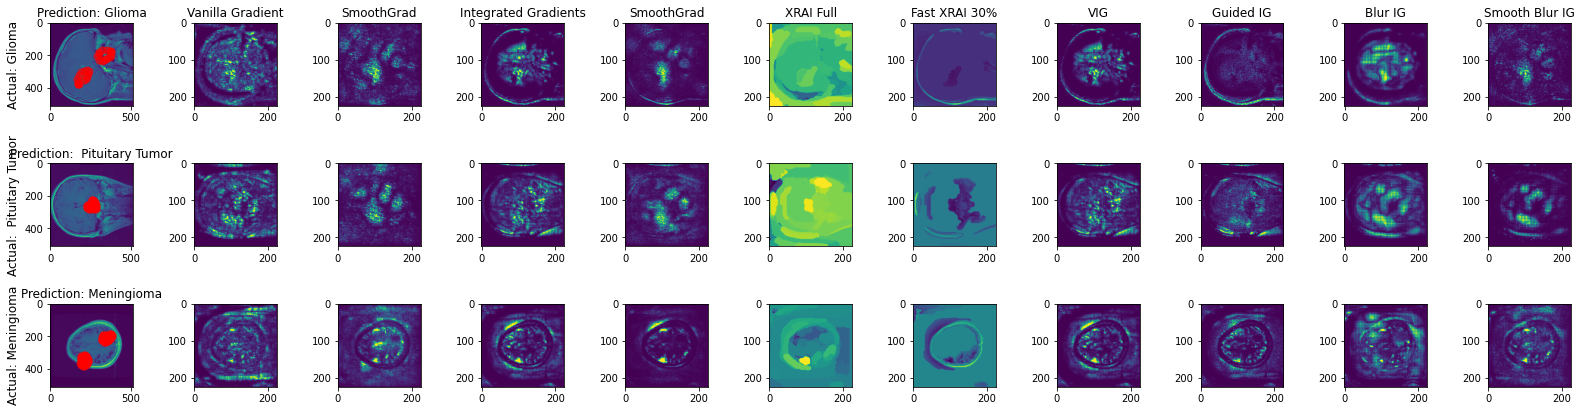

In [21]:
#@title Visualizating the saliency maps
titles = ['Input Image', 'Vanilla Gradient','SmoothGrad','Integrated Gradients','SmoothGrad','XRAI Full','Fast XRAI 30%','VIG', 'Guided IG','Blur IG','Smooth Blur IG']
r,c =  3,len(mycollection)//3 #r is the  number of rows and c is the number of columns
img_idx =  list(np.arange(0,int(r*c),c))
fig, axs = plt.subplots(r,c, figsize=(22,6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .002, wspace=.001)
axs = axs.ravel()
for i in range(int(r*c)):
  if( i in list(range(c))):
    axs[i].set_title(titles[i],fontsize=12)
  axs[i].imshow(np.squeeze(mycollection[i]))
  # axs[i].axis('off')
  if(i  in img_idx):
    if(i == img_idx[0]):
      tumorBorder = data['tumorBorder'][0]
      axs[i].set_ylabel(f'Actual: {str(dl.CLASSES[dl.y[data["idx"][0]]]).title()}',fontsize=12)
      axs[i].set_title(f'Prediction: {dl.CLASSES[data["prediction_class"][0]].title()}',fontsize=12)
    elif(i == img_idx[1]):
      tumorBorder = data['tumorBorder'][1]
      axs[i].set_ylabel(f'Actual: {str(dl.CLASSES[dl.y[data["idx"][1]]]).title()}',fontsize=12)
      axs[i].set_title(f'Prediction: {dl.CLASSES[data["prediction_class"][1]].title()}',fontsize=12)
    elif(i == img_idx[2]):
      tumorBorder = data['tumorBorder'][2]
      axs[i].set_ylabel(f'Actual: {str(dl.CLASSES[dl.y[data["idx"][2]]]).title()}',fontsize=12)
      axs[i].set_title(f'Prediction: {dl.CLASSES[data["prediction_class"][2]].title()}',fontsize=12)
    for j in range(tumorBorder.shape[0]-1):
      axs[i].scatter(tumorBorder[j],  tumorBorder[j+1],marker=".", color="red", s=200, alpha=0.6,zorder=2)
fig.tight_layout()
plt.savefig(f'./Figures/Saliency_Maps_{model.name}.svg', bbox_inches ="tight", dpi=300)
plt.show()